# Risco de crédito alemão

#### As instituições financeiras são aquelas que trabalham com transformações de maturidades através do mecanismo de crédito, captando recursos por meio de depósitos, por exemplo, para financiar os empréstimos para consumo e investimento dos demais agentes econômicos, sendo estes empréstimos seus ativos financeiros. Nesse sentido, existe um risco inerente a atividade financeira: **o não recebimento dos empréstimos realizados**. Esse risco pode ser ainda pior para instituição financeira se, ao mesmo tempo que os empréstimos disponibilizados não são quitados, os demais agentes econômicos passam por uma redução das expectativas positivas e começam a retirar recursos financeiros da instituição. Em resumo, ocorre a liquidação de seus passivos (retiradas de recursos financeiros), no mesmo mmomento existe a redução no pagamento de seus ativos (empréstimos), prejudicando a atividade financeira e toda a economia não financeira à depender do impacto dessa dinâmica e do efeito transbordamento para outras instituições financeiras e não financeiras na economia.
#### Sob esse ponto de vista, existe diferentes tipos de regulações sobre a forma como as instituições financeiras podem atuar na economia através da captação e concessão de recursos financeiros. Assim, no ambiente interno das instituições são realizados diversos estudos que envolvem a análise de dados para compreender melhor o **risco de crédito** dos agentes econômicos, utilizando de todas as informações disponíveis sobre cada cliente e como essas informações podem indicar a probabilidade dos recursos serem ou não pagos ao longo do tempo, maximizando a atuação do banco. Por essa lógica apresentada, a análise abaixo foca no estudo do risco de crédito alemão, com base de dados disponibilizadas no *Kaggle*, com o objetivo de indicar se a probabilidade de pagamento é boa ou ruim com base no método de *Machine Learning*.

## Bibliotecas para análise dos dados

#### As bibliotecas abaixo foram separadas em "três fases" para indicar o próprio procesdimento de trabalho que será realizada na análise estrutural, exploratória e aprendizado de máquina logo abaixo.  O primeiro chunk com bibliotecas são aquelas utilizadas para a primeira fase da análise de dados, partindo desde o processo de leitura e incorporação dos dados no *Python* com o *Pandas*, manipulação dos dados com a mesma biblioteca e a *Numpy*. A bilioteca *Category_encoders* servirá para trabalhar com as variáveis categóricas no momento de finalizar o modelo de *Machine Learning* e as demais bibliotecas servem para processos de visualização de dados.

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv 

#### Na sequência é aplicada a biblioteca *Scikit-learn*, proporcionando a possibilidade de trabalhar de maneira simples e eficiente ferramentas utilizadas para as análises preditivas. Esta biblioteca permite que sejam trabalhados modelos de *Machine Learning* a partir de métodos de classificação, regressão e agrupamento (*clustering*).

In [2]:
# modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#### Por fim, novamente a biblioteca *Pandas* é utilizada para já proporcionar uma estrutura geral para os dados que serão trabalhados a seguir, permitindo que exista uma estrutura geral ao modificar o *layout* dos dados que serão apresentados. Por exemplo, são definidas, respectivamente, a largura das colunas para apresentar toda a informação, o máximo de linhas e colunas que serão mostradas nesta análise, as casas decisão, definindo a precisão e como será seu formato.  

In [3]:
# settings: aplicação do pandas para ajustar a estrutura dos dados, modificando o layout dos dados.
pd.set_option('max_colwidth', 1000) # largura da coluna, mostrando muita informação
pd.set_option('max_rows', 20)  # máximo de linhas mostradas
pd.set_option('max_columns', 1000) # máximo de colunas que aparecem
pd.set_option('precision', 2) # casas decimais
pd.options.display.float_format = '{:,.2f}'.format  # apresentar as duas casas decimais

## Análise preliminar sobre a estrutura dos dados

#### Para começar a análise estrutural/exploratória dos dados, o pesquisador deve conhecer como os dados estão estruturados e o que cada *feature*/vetor/coluna da matriz de risco de crédito apresenta como informação. As linhas são mais fáceis de compreender, visto que são informações de cada agente da base de dados. Assim, Abaixo encontram-se as informações resumidas de cada vetor:

#### Age (Idade - dado numérico)
#### Sex (Sexo - texto: male (masculino), female(feminino))
#### Job (Emprego - numérico: 0 — unskilled and non-resident (baixa habilidade e não residente), 1 — unskilled and resident (baixa habilidade e residente), 2 — skilled (habilidoso), 3 — highly skilled (muito habilidoso))
#### Housing (Casa - texto: own (própria), rent (alugada), or free (gratuita))
#### Saving accounts (Conta poupança - texto: little (pouco), moderate (moderado), quite rich (muito rico), rich (rico))
#### Checking account (Conta corrente - numérico: moeda em marco alemão (Deutsch Mark - DM))
#### Credit amount (Quantidade de crédito - numérico - DM)
#### Duration (Duração - numérico, em meses)
#### Purpose (Proposta - texto: car (carros), furniture/equipment (equipamentos), radio/TV (bens duráveis), domestic appliances (aplicações domésticas), repairs (reparos), education (educação), business (negócios/investimento), vacation/others (férias/outros))

In [4]:
credrisk = pd.read_csv('german_credit_data.csv', index_col= 0)
credrisk

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


 #### Após a leitura do arquivo pela biblioteca *Pandas*, os dados estão corretos porque foi utilizado o código index_col= 0. Caso não tivesse sido colocado já na leitura do arquivo, a primeira coluna estaria sem nome (*Unnamed: 0*), servindo apenas para mostrar o número das linhas, o que já é realizado automaticamente pelo *Pypthon*. Para retirar de outro modo, é necessário "dropar" esse vetor (*axis*) e salvar essa modificação no *dataset* (*inplace*). O código ficaria da seguinte forma: credrisk.drop('Unnamed: 0', axis= 1, inplace= True)

In [5]:
credrisk = credrisk.rename(columns={"Credit amount": "Credit_amount"})
credrisk = credrisk.rename(columns={"Checking account": "Checking_account"})
credrisk = credrisk.rename(columns={"Saving accounts": "Saving_accounts"})

#### Após ler os dados, algumas colunas possuem nomes separados por espaço (" "), o que pode ser um problema para análise posteriores. Com isso em mente, aplicar o *rename* nessas *features* pode facilitar o trabalho mais a frente, principalmlente porque são poucos vetores, sem grandes transtornos para serem realizados. O resultado pode ser observado logo abaixo.
#### As informações sobre  a estrutura geral de dados podem ser encontradas pelos termos head (apresenta as primeiras linhas) e tail(as últimas linhas). Contudo, não  é possível identificar se existem problemas nos dados no meio da base de dados. Por isso, como já disponibilizada as 5 primeiras e últimas linhas acima, uma estratégia mais eficiente para avaliar a estrutura geral da base de dados ocorre  a partir do comando info, apresentando a estrutura geral, tipos dos dados,  suas colunas e se existem ou não null values.


In [6]:
credrisk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


#### Com base nessa análise gerais das variáveis, o primeiro ponto de interesse é que existem 1000 entradas, como apontado na segunda linha. Contudo, quando analisa-se cada linha do vetor coluna, algumas variáveis não possuem as mesmas mil entradas. Esse é o caso para as contas de poupança (*accounts saving*) e contas corrente (*checking account*), cada um desses vetores possuem 817 e 606 entradas, respectivamentos. Consequentemente, essa base de dados de análise de risco de crédito possui valores faltantes (*null values*), o que pode impactar o resultado da análise: **redução do risco de crédito na organização**.


In [7]:
credrisk.isna().mean()  # ou .sum()

Age                0.00
Sex                0.00
Job                0.00
Housing            0.00
Saving_accounts    0.18
Checking_account   0.39
Credit_amount      0.00
Duration           0.00
Purpose            0.00
Risk               0.00
dtype: float64

#### Para compreender a quantidade de *null values* na amostra de dados, é possível aplicar um comando específico que indicará quantidade absoluta desses valores faltantes em cada vetor (*.sum()*) ou relativos, em forma de porcentagem, (*.mean()*). Note que, de maneira semelhante aos resultado obtidos com o ".info()", o resultado indica os vetores com valores faltantes, entretanto, a vantagem do comando "isna()" ocorre por indicar exatamente a quantidade desses vetores ou a porcentagem, como demonstrado no código acima. Desse modo, existem 0.18% e 0.39% de *null values* nas contas poupança e corrente, respectivamente, contudo, como os resultados de *null values* são baixos e não é o objetivo a demonstração de seu tratamento, os dados serão trabalhados da forma original.

#### Aqui é importante fazer uma ressalva, caso o trabalho fosse realizar o tratamento dos dados, o modelo *Machine Learning* via *Random Forest* para a definição do risco de crédito entre bom e mau pagador, o tratamento dos dados *null values* não pode ser realizado neste momento porque a base de dados ainda será dividida entre treinamento e teste. Caso os valores faltantes fosse aqui resolvido, possivelmente existiria a "contaminação" na divisão da base de dados, problema conhecido como *data lakeage*, mais um dos problemas que podem levar ao *overfitting*.
#### Outro ponto de bastante interesse nessa análise preliminar sobre a forma de estruturação dos dados é a última coluna, responsável por apresentar como os dados estão disponibilizados na amostra, ou seja, os tipos de dados de cada vetor. É importante notar que alguns dados são objetivos e outros números inteiros, especialmente sobre os números inteiros, alguns cuidados devem ser realizados neste período inicial de análise para não enviesar os resultados obtidos no modelo de *Machine Learning*. Isso pois, a ideia do tipo de vetor numérico inteiro é que exista "ordem" entre os números, com o número "2" sendo superior ao "1" e o número "3" superior aos dois números anteriores. Contudo, certos vetores podem não querer indicar essa sequência tradicional de números inteiros, como o *Python* entende, visto que a coluna *Job* (emprego) possui quatro classificações em forma de números, mas não quer dizer que o emprego 4 seja superior ao 3, por exemplo, é apenas uma classe diferente,sendo considerada uma variável categórica. Além do emprego, existem outras variáveis categóricas, mas que estão em forma de objeto, como o sexo (*sex*) e tipo da casa (*housing*) mas estas estão em formas de *strings* (letras). 

## Análise da estatística descritiva

In [8]:
credrisk.describe()

,Age,Job,Credit_amount,Duration
count,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,1.90,"3,271.26",20.90
std,11.38,0.65,"2,822.74",12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,"1,365.50",12.00
50%,33.00,2.00,"2,319.50",18.00
75%,42.00,2.00,"3,972.25",24.00
max,75.00,3.00,"18,424.00",72.00


#### Com o comando *describe* é apresentada a estatística descritiva. Aqui, novamente, também precisamos tomar cuidado com aquelas variáveis que são consideradas categóricas, como a *job* porque a média de 1.9 não é real na medida em que só existem quatro possibilidades: 1, 2, 3, 4. Por outro lado, *insights* interessantes podem ser retirados de outras variáveis númericas. A média de idade das pessoas que tomaram crédito no mercado alemão é de, aproximadamente, 35 anos, com um desvio padrão próximo de 11 anos. A idade mínima foi de clientes com 19 anos e máxima de 75 anos.
####  O vetor da quantidade de crédito tomada (*credit amount*) apresenta alguns resultados interessantes no mercado de crédito alemão, a média dos empréstimos são pouco mais de três mil e 200 marcos alemão (*Deutsch Mark*), com desvio padrão de 2,822 marcos e valor mínimo e máximo de 250 e 18,424, respectivamente.
#### Outro dado interessante que pode ser obtido pela estatística descritiva  é  sobre a duração do  tempo de empréstimo, veja que a  média é de quase 21 meses, com  12 meses de desvio padrão. O período mínimo de contratação  de empréstimo foi de 4 e o máximo de 72 meses (6 anos). Nesta análise também podem ser realizadas pelos quartis (25%, 50%, 75%).
#### Ainda mais interessante, também  pode-se produzir análises descritivas a partir de certo grupo de interesse, diferentemente desta primeira análise que pautou a trajetória geral desses três vetores, mas, uma pergunta mais avançada poderia ser: **"Existem diferenças na dinâmica de crédito alemão entre homens e mulheres?"**. Esse processo é possível de ser realizado através do agrupamento por sexo, como realizado abaixo. 

In [9]:
credrisk.groupby("Sex")["Age", "Credit_amount", "Duration"].mean()

C:\Users\leona\AppData\Local\Temp/ipykernel_796/1298252594.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  credrisk.groupby("Sex")["Age", "Credit_amount", "Duration"].mean()


,Age,Credit_amount,Duration
Sex,,,
female,32.80,"2,877.77",19.44
male,36.78,"3,448.04",21.56


#### #### De maneira geral, a média de idade dos agentes econômicos masculinos e femininos são bastante próximos, com os agentes masculinos tomando créditos com média superior ao feminino em uma  duração bastante próxima (2 meses de diferença).

In [10]:
credrisk.groupby("Sex")["Age", "Credit_amount", "Duration"].min()


C:\Users\leona\AppData\Local\Temp/ipykernel_796/1888114397.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  credrisk.groupby("Sex")["Age", "Credit_amount", "Duration"].min()


,Age,Credit_amount,Duration
Sex,,,
female,19,250,4
male,20,276,4


#### Na idade mínima, novamente os tomadores de crédito masculinos e femininos possuem entre 19 e 20 anos, tomando crédito de curta duração  (4 meses) e valores bem próximos. Esses valores não  poderiam ser diferentes, visto que nessa idade a nota de crédito dos agentes costumam ser baixas, com poucos bens para utilizarem de contraparte ou até mesmo baixa renda proveniente do trabalho.

In [11]:
credrisk.groupby("Sex")["Age", "Credit_amount", "Duration"].max()

C:\Users\leona\AppData\Local\Temp/ipykernel_796/471431012.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  credrisk.groupby("Sex")["Age", "Credit_amount", "Duration"].max()


,Age,Credit_amount,Duration
Sex,,,
female,75,18424,60
male,75,15945,72


#### No período final de analise, a idade foi a mesma, mas com um diferencial no valor do crédito tomada e período de pagamento. Para a primeira questão, a tomada de crédito pela mulher foi superior ao homem, mas o homem tommaram crédito com pagamento em período mais longo.

In [12]:
credrisk.groupby("Job")["Age", "Credit_amount", "Duration"].mean()

C:\Users\leona\AppData\Local\Temp/ipykernel_796/84286471.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  credrisk.groupby("Job")["Age", "Credit_amount", "Duration"].mean()


,Age,Credit_amount,Duration
Job,,,
0,40.09,"2,745.14",17.36
1,36.54,"2,358.52",16.54
2,34.25,"3,070.97",21.41
3,39.03,"5,435.49",25.17


#### A separação do grupo de análise por meio dos empregos pode ser bastante interessante porque aglutina pela habilidade e residência dos agentes econômicos, independente de seu sexo. Nessa análise, o emprego "0" é o com menor habilidade e não residente e "3" com maior habilidade. Espera-se que estes agentes sejam aqueles que tenham maior nota de crédito e maior acesso ao crédito no mercado financeiro, enquanto os primeiros tenham maior dificultado para contrair empréstimo de maior valor. Esse resultado fica bastante evidente no vetor *credit amount*. Como resultado da maior segurança proveniente desses cargos de maior habildiadade, que possivelmente possibilitam maior estabilidade econômica e social, a maior nota de crédito permite que, apesar do maior valor do crédito contraindo perante as instituições financeiras, a duração desses empréstimos também tenham um maior período de duração (25 meses em média).
#### Passada essa primeira análise da tabela descritiva, considerando o resultado geral dos dados e o agrupamento por sexo e emprego que os agentes econômicos da base de dados possuem, abaixo são realizados novos procedimentos que visam avançar no entendimento sobre a amostra de dados que analisa o risco de crédito no mercado financeiro alemão.


### Variáveis categóricas

#### Anteriormente foi ressaltado a importância de distinguir as variáveis categóricas das númericas. Algumas são mais fáceis, como é o caso do vetor *sex*, porque existem somente agentes masculinos e femininos. Entretanto, com um *dataset* grande, com muito vetores, a tarefa de análise manual pode tornar-se excessivamente improdutiva, gastando tempo em demasia dentro do ambiente organizacional. Nesse sentido, é possível adiantar esse processo de identificação das variáveis categóricas, criando um *loop* como forma de identificação. 
#### Um *looping* nada mais é que uma forma de fazer "tarefas" que seriam repetitivas, de uma forma automatizada no *Python*, aumentando a produtividade durante os trabalhos de análises de dados. A ideia do *looping* abaixo é trazer informações sobre quais são as variáveis categóricas da matriz de análise, não é algo definitivo e exato, mas permite que o processo de análise seja mais rápido e produtivo (quando existem muitos vetores na matriz de análise). 

In [13]:
teste_categorica = {}

for t in credrisk.columns:
    teste_categorica[t] = 1.0 * credrisk[t].nunique() / credrisk[t].count() < 0.03

teste_categorica

{'Age': False,
 'Sex': True,
 'Job': True,
 'Housing': True,
 'Saving_accounts': True,
 'Checking_account': True,
 'Credit_amount': False,
 'Duration': False,
 'Purpose': True,
 'Risk': True}

#### Com o código acima, a ideia geral é que se existirem poucos valores únicos em determinado vetor, a maior probabilidade é que seja uma variável contínua. Contudo, se os valores se repetirem por diversas vezes, com poucos ou nenhum valor sendo único, a maior probabilidade é de que a variável seja categórica. Veja que faz sentido a análise, porque como em um *dataset* com N linhas, os vetores com muita repetição em uma amostra com, por exemplo, mil linhas, indica que existem algumas categorias neste vetor e por isso se repete bastante os dados. Em resumo, as variáveis que retornam do *looping* como *true* (verdadeira), possuem grande probabilidade de serem categóricas. Este é um processo importante de se aplicar durante o processo de análise de dados em um *dataset* com uma matriz de X linhas e 100 colunas, por exemplo, dada a automatização do processo, aumentando a produtividade do cientista de dados.

#### Nas análises acima foram destacadas as estatísticas descritivas das variáveis contínuas, utilizando as categóricas apenas como base para compreender idade, quantidade e tempo do crédito, por exemplo. Mas, a análise de variável categórica pode ir adiante para entender a estrutura dos dados bancários alemão da amostra. Por exemplo, pode subdividir a amostra para extrair a quantidade de agentes econômicos masculinos e feminos existentes, a quantidade de agentes econômicos nos diferentes níveis de especialidade do trabalho, propósito do crédito (no que será utilizado) e "riqueza" por tipo de conta, como são apresentados abaixo.

In [14]:
credrisk.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [15]:
credrisk.Job.value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

#### Nos dois códigos acima é possível observar a predominância de agentes do sexo masculino e com empregos de habilidades intermediárias (1 e 2). Contudo, além dessa divisão de estrutura para facilitar o entendimento da divisão da amostra em grupos, também pode ser aplicada uma análise que toma como base a porcentagem, como realizado para o vetor *housing* abaixo, com mais de 70% da amostra pertencente a contagem *own*, ou seja, que possuem casas próprias.

In [16]:
credrisk.Housing.value_counts(normalize= True).sort_index()

free   0.11
own    0.71
rent   0.18
Name: Housing, dtype: float64

#### Abaixo é realizada a criação de uma nova variável (*target risk*) que será utilizada para cumprir o objetivo de análise dos dados de crédito alemão, conseguindo definir os agentes econômicos que possuem maior risco de crédito. Nesse sentido, a biblioteca *Numpy* é muito importante porque permite a manipulação da estrutura dos dados, criando uma condição e retornando valores se a condição for verdadeira e se a condição for falsa. Assim, zero representa bom risco de crédito e um risco de crédito ruim. Já no sexo, o resultado em variável dummy indica que um é os agentes do sexo masculino e zero feminino

In [17]:
credrisk['Target_Risk'] = np.where(credrisk['Risk'] == "bad", 1, 0)
credrisk['Sex_number'] = np.where(credrisk['Sex'] == "male", 1, 0)
credrisk

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Target_Risk,Sex_number
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,0
2,49,male,1,own,little,NaN,2096,12,education,good,0,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0,1
4,53,male,2,free,little,little,4870,24,car,bad,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,0,0
996,40,male,3,own,little,little,3857,30,car,good,0,1
997,38,male,2,own,little,NaN,804,12,radio/TV,good,0,1
998,23,male,2,free,little,little,1845,45,radio/TV,bad,1,1


In [18]:
credrisk.drop('Risk', axis= 1, inplace= True)
credrisk.drop('Sex', axis= 1, inplace= True)
credrisk

,Age,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Target_Risk,Sex_number
0,67,2,own,NaN,little,1169,6,radio/TV,0,1
1,22,2,own,little,moderate,5951,48,radio/TV,1,0
2,49,1,own,little,NaN,2096,12,education,0,1
3,45,2,free,little,little,7882,42,furniture/equipment,0,1
4,53,2,free,little,little,4870,24,car,1,1
...,...,...,...,...,...,...,...,...,...,...
995,31,1,own,little,NaN,1736,12,furniture/equipment,0,0
996,40,3,own,little,little,3857,30,car,0,1
997,38,2,own,little,NaN,804,12,radio/TV,0,1
998,23,2,free,little,little,1845,45,radio/TV,1,1


#### O comando acima foi realizado simplesmente para retirar as variáveis originais (*Risk* e *Sex*).

## Análise exploratória dos dados (*Exploratory Data Analysis* - EDA)

#### Passada a análise sobre a forma como os dados estão estruturados, agrupados e a contagem de diferentes vetores da matriz de dados sobre o risco de crédito alemão, agora é possível avançar para a análise exploratória de maneira visual, construindo gráficos, quadro e tabelas que permitam avançar no entendimento sobre como os dados estão disponibilizados na amostra. Essa é uma etapa bastante interessantes e instigante pois permite  aumentar o conhecimento sobre  os dados e produzir mais *insights* sobre os possíveis resultados ou modelos que podem ser aplicados para os dados analisados. Existem diversas bibliotecas que podem auxiliar nesse processo, sendo talvez a mais famosa a *Matplotlib*, mas vale destacar algumas interessantes como  a *Plotly*, *Altair* e *Seaborn*. Muitas das disposições por tabelas realizadas anteriormente poderiam ser realizadas de forma gráficas, mas este não é o objetivo do trabalho no momento.
#### Como já foi realizada uma ampla análise estrutural dos dados anteriormente, o foco de análise neste momento será apenas na construção de uma *dashboard* geral sobre os dados, possibilitando uma rápida análise sobre cada uma das *features* utilizadas nesse processo de modelagem. Para tal objetivo, a biblioteca *Sweetviz* será a escolhido, pois, também permite que análise mais detalhadas sejam realizadas.

In [19]:
dashcred = sv.analyze(credrisk)
dashcred.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



#### A introdução de uma *dashboard* é bastante importante porque permite que  seja visto graficamente a distribuição dos dados da amostra de crédito. Quando o objetivo da análise não é realizar propriamente a **EDA**, detalhando e agrupando as variáveis para análises exploratórias. Esta parte pode ser realizada rapidamente através da biblioteca *Sweetviz*, aumentando a efetividade do trabalho na medida em que permite rapidamente passar para os modelos mais avançados, como é o presente caso de aplicação do método de *Machine Learning* realizado logo a seguir.
#### Com os dados obtidos pela *dashboard*, pode-se clicar em alguma das variáveis que tenham um pouco mais de interesse e observar seus resultados de maneira mais detalhada, sendo a agrande vantagem dessa biblioteca: **apresenta os resultados gerais e específicos de cada *feature* caso seja necessário um olhar mais atento**.

## *Machine Learning: Random Forest*

#### O *Machine Learning* (ML) é um dos tipos de métodos aplicados quando os pesquisadores desejam produzir predições com base em uma amostra de dados, como é o caso atual de predição sobre o risco de crédito no setor financeiro alemão. Assim, o ML tem como objetivo produzir um algoritmmo de aprendizado de máquina que possa predizer, com certo intervalo de confiança, de que determinado resultado é possível dada as condições de entradas utilizadas (variáveis explicativas). Portanto, espera-se que com a aplicação do ML, o algoritmo aprenda efetivamente sobre certa estrutura de dados e que este modelo possa ser aplicado para definir se certo agente tem determinada condição. No caso aqui trabalhado, o foco é fazer a "máquina" aprender sobre risco de crédito com base na amostra e poder ser aplicada para predizer se futuros clientes possuem probabilidade de pagamento (boa) ou não pagamento (ruim).
#### Já o *Random Forest* é um modelo do tipo *ensembled* utilizado para aglutinar diferentes tipos de aprendizado de modo a produzir resultado com melhor acurácia a partir da árvore de decisão. Para isso, esse modelo faz diferentes subamostras com reposição, a partir do *dataset* original (risco de crédito alemão), gerando diferentes árvores de decisão. Após diversas repetições desse processo, o modelo define as melhores variáveis com base em todas essas amostras com repetição realizadas, apresentando o resultado final a partir do resultado que se espera, no caso do trabalho o bom pagador. 
#### Desse modo, como existe todo esse processo de amostras com repetição, existe uma menor probabilidade de que os resultados estejam com sobreajuste (*overfitting*) no treinamento, o que prejudicaria os resultados no momento do teste, última etapa antes do modelo ser colocado em operação no sistema financeiro para avaliar o risco de crédito dos agentes econômicos.


In [20]:
explicativa = ["Age", "Job", "Credit_amount", "Checking_account", "Saving_accounts", "Purpose", "Housing", "Duration", "Sex_number"]
explicada = "Target_Risk"

explicativa

['Age',
 'Job',
 'Credit_amount',
 'Checking_account',
 'Saving_accounts',
 'Purpose',
 'Housing',
 'Duration',
 'Sex_number']

In [21]:
credrisk.columns

Index(['Age', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Target_Risk', 'Sex_number'],
      dtype='object')

#### Acima foi definida primeiramente as variáveis explicativas do modelo de risco de crédito e, na sequência, a variável explicada (alvo) do risco de crédito: **saber se o cliente é um bom ou mau pagador**.
#### Também, agora é necessário iniciar a divisão do *dataset* entre a base utilizada para treinamento e teste, considerando que 70% da amostra será direcionada para o tratamento, normalmente nesta fase estão a maior parte dos dados (acima de 50%), e 30% para o teste, ou seja, a validação do modelo *Machine Learning: Random Forest* para o risco de crédito no mercado financeiro alemão. Por fim, o *random_state* é um comando utilizado para permitir que o exercício possa ser reprodutível, captando os mesmos dados no *split* (divisão entre treinamento e teste).

In [22]:
X = credrisk[explicativa]
y = credrisk[explicada]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.3, random_state= 11
)

#### Após a definição da variável explicativa (X) e explicada (y), os dados de X e y são divididos em treinamento e teste, apontados pelo *test_size* e o *random_state* permite que seja reprodutível a análise aqui aplicada.
#### Já no código abaixo, são separadas as variáveis consideradas categóricas e numéricas para que no caso das primeiras, possam ser realizada a construção de *dummies*. Todo e qualquer procedimento que vise trabalhar a base de dados por meio de tratamentos de variáveis categóricas, *null values*, dentre outros procedimentos, deve ser realizado somente a partir daqui.
#### Como ressaltado, isso se deve ao fato de evitar que exista certa "contaminação" dos valores de testes decorrentes de tratamentos realizados com base em toda a amostra de dados (treinamento + teste), pois, a ideia é que os dados de teste são novos, sem conhecimento prévio de toda sua estrutura.


In [23]:
cat_explicativa = ["Job", "Housing", "Checking_account", "Saving_accounts", "Purpose", "Sex_number"]
num_explicativa = ["Age", "Credit_amount", "Duration"]

In [24]:
teste = ce.OneHotEncoder(cols= cat_explicativa)

X_train = teste.fit_transform(X_train)

X_train.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit_amount,Checking_account_1,Checking_account_2,Checking_account_3,Checking_account_4,Saving_accounts_1,Saving_accounts_2,Saving_accounts_3,Saving_accounts_4,Saving_accounts_5,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration,Sex_number_1,Sex_number_2
670,27,1,0,0,0,4139,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,24,1,0
6,53,0,1,0,0,2835,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,24,1,0
477,25,0,1,0,0,5152,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,24,1,0
158,38,0,1,0,0,3512,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,24,1,0
508,28,0,1,0,0,1413,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,24,1,0


In [25]:
X_test = teste.transform(X_test)

X_test.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit_amount,Checking_account_1,Checking_account_2,Checking_account_3,Checking_account_4,Saving_accounts_1,Saving_accounts_2,Saving_accounts_3,Saving_accounts_4,Saving_accounts_5,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration,Sex_number_1,Sex_number_2
25,36,1,0,0,0,1374,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,6,1,0
464,34,0,1,0,0,1950,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,18,1,0
372,23,0,1,0,0,2146,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,10,0,1
730,33,0,1,0,0,6403,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,24,1,0
757,39,0,1,0,0,1271,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,15,1,0


#### Um detalhe bastante importante realizado nos procedimentos acima ocorre pela manipulação das variáveis categóricas ocorrendo no período de treinamento (*fit_transform*) e essa transformação sendo direcionada para o período de teste (*transform*). Veja que nas variáveis categóricas explicativas (X) para o treino e teste foram criadas diferentes dummies, ou seja, variáveis binárias que indicam a presença ou não de determinada características. Desse modo, no Job_1 somente terá o número categórico "1" aqueles agentes que pertencem a este tipo de emprego, o restante retornando o número categórico "0", isso pode ser melhor visto ao considerar o Job_2, Job_3 e Job_4. Consequentemente, ao aplicar essa técnica de separação das variáveis categóricas, a nova análise permite captar a diferença de valor retornado por categorias.

### Classificador *Random Forest*

#### A seguir é trabalhada a aplicação do modelo de *Machine Learning - Random Forest* através do classificador, pois o objetivo proveniente da variável dependente é categórico, ou seja, se o cliente é um bom (zero) ou mal pagador (um) em relação ao crédito concedido. A partir da definição do *random forest* por classificador, é possível treinar o modelo através do *fit*.

In [26]:
# Classificador random forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

#### Passada a última estruturação dos dados, o cógido acima começa pela criação do objeto classificador *random forest* para que o modelo de *Machine Learning* possa ser treinado. É exatamente neste momento que as árvores de decisão são construídas para definir como o modelo pode melhor se adequadar a estrutura de dados que possuímos sobre o sistema financeiro alemão.
#### Feito o processo de treinamento do modelo, agora é o momento de validar o treinamento, produzindo a análise sobre o restante da amostra de dados, amostra de teste. Vale destacar novamente que o resultado será binário (0 ou 1), indicando se o cliente deve ser bom ou mau pagador, ou seja, zero representa bom risco de crédito e um risco de crédito ruim.

In [27]:
y_pred = clf_rf.predict(X_test)

y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### No *Array* acima é possível observar de maneira geral os resultados preditivos do modelo desenvolvido, contudo, alguns testes são necessários para que exista confiança sobre os resultados do modelo. Uma dessas formas é a acurácia, comparando os resultados preditos (y_pred) em relação ao resultados reais (y_test). Contudo, ressalvas aos resultados obtidos devem ser expostas, por exemplo, a elevada acurácia pode indicar que um modelo que possui quase todos seus dados positivos (bom saldo de crédito), pode produzir um modelo que leia bem essa dinâmica ao predizer que todos são bons pagadores, mas acaba por não captar os resultados do mau pagador, trazendo resultados operacionais para o negócio ruim, dada a concessão de crédito para agentes econômicos que não deveriam ter acesso aos empréstimos. Em resumo, quando a amostra de dados é desbalanceada para certa classe, a acurácia pode proporcionar a ilusão da existência de um bom modelo de *Machine Learning*.

In [28]:
print("Acurácia: " + str(accuracy_score(y_test, y_pred)))

print("F1 Score: {}".format(f1_score(y_test, y_pred)))

Acurácia: 0.6933333333333334
F1 Score: 0.425


#### O resultado foi de uma acurácia de 70.33%, não ficando com um resultado bom dado que o modelo acerta apenas em 70% das vezes, oferecendo crédito para clientes com maior probabilidade de inadimplência (*default*) nos outros 30%. Contudo, além da acurácia, uma outra medida que pode ser utilizada para avaliação do modelo de *Machine Learning*, inclusive para dados desproporcionais, é o *F1 Score*. Esta é uma medida de média harmônica que relaciona a precisão e *recall* para avaliar o modelo, quanto mais próximo de 1, mais efetivo é o modelo desenvolvido. Novamente, o resultado para esta outra métrica foi ruim, ficando abaixo da própria acurárica (43.4%). Como foi ressaltada a questão da precisão e *recall*, abaixo serão trabalhadas as duas medidas separadamente, proporcionando mais *insights* sobre o modelo desenvolvido. 

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [30]:
print("True Positive: " + str(tp))
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))

True Positive: 34
True Negative: 174
False Positive: 28
False Negative: 64


In [31]:
# Medida de precisão: entre todos os dados classificados como positivos, quantos são realmente positivos.
# Medida de acerto: entre todos os dados verdadeiros positivos, conseguiu identificar os verdadeiros positivos dos falsos negativos.
precisao = 37/(37+28)
acerto = 37/(37+61)


print("Precisão do modelo: " + str(precisao))
print("Acerto do modelo: " + str(acerto))

Precisão do modelo: 0.5692307692307692
Acerto do modelo: 0.37755102040816324


#### O objetivo da precisão é indicar que entre todos os dados classificados como positivos (objetivo do trabalho de análise de risco de crédito), quantos são realmente positivos, ou seja, indica os classificados como pertencentes a uma classe e que realmente são desta classe, como é o caso do verdadeira positivo. Neste quesito, o resultado continuou baixo, acertando em torno de 56.92%% das vezes.
#### Já o *recall*, acerto do modelo, é responsável por indicar os resultados de uma classe, comparanda esta mesma classe mais ao resultados ditos desta classe mas que pertencia à outra, ou seja, compara os verdadeiros positivos, dividido pela soma deste mais os falsos negativos. Neste caso, os resultados foram ainda piores, 37.76%, indicando que o modelo apresenta muitos falsos negativos, negando crédito a um bom tomador.

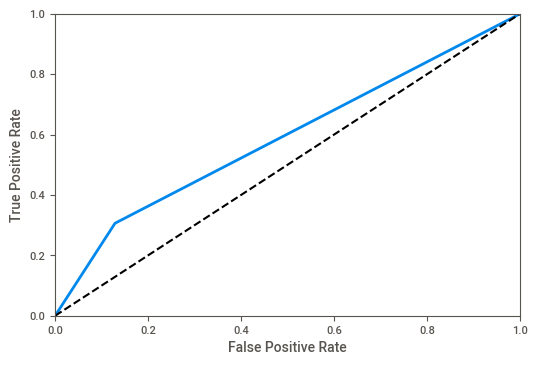

In [32]:
y_scores = cross_val_predict(clf_rf, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

#### Aqui novamente é demonstrado que o modelo não possui um excelente ajuste para os dados preditivos sobre o risco de crédito dos clientes. Isso porque o  ideal é que aquele movimento inicial da curva azul fosse mais inclinado e contínuo. Assim, novamente os resultados embasam que o modelo desenhado não foi o suficiente para predizer os dados de empréstimos do mercado alemão. Novamente, apesardo modelo não ter sido eficiente, a sua realização é importante para indicar o que não deve ser realizado pela instituição financeira no momento da tomada de definição do risco de crédito de cada cliente, impedindo que créditos sejam ofertados para aqueles agentes que possuem maior probabilidade de *default*.

#### Um dos motivos que podem ter levado a esta adequação ruim do modelo em diferentes métricas, é a próprio erro no momento de definir quais são as variáveis relevantes. Entretanto, a base disponibilizada pelo *Kaggle* apresenta apenas algumas variáveis, não sendo possível modificar tanto a estrutura posta do modelo. Mas para procurar entender se realmente as variáveis utilizadas explicam pouco a dinâmica de disponibilização de crédito no mercado alemão, os códigos abaixos apresentam a importância das variáveis.

In [33]:
clf_rf.feature_importances_

array([0.1611702 , 0.0171995 , 0.02554025, 0.02066436, 0.0059158 ,
       0.19218129, 0.06527628, 0.01101653, 0.02498178, 0.04239218,
       0.01172033, 0.00975009, 0.03421161, 0.01897372, 0.00797169,
       0.01561682, 0.02094358, 0.02540084, 0.02513546, 0.00313548,
       0.00787532, 0.01486122, 0.00348342, 0.02170702, 0.01728239,
       0.01333818, 0.13875186, 0.02107789, 0.02242493])

In [34]:
variaveis_importantes = pd.Series(clf_rf.feature_importances_, index= X_train.columns).sort_index(ascending= False)
variaveis_importantes

Sex_number_2         0.02
Sex_number_1         0.02
Saving_accounts_5    0.01
Saving_accounts_4    0.02
Saving_accounts_3    0.03
                     ... 
Checking_account_4   0.04
Checking_account_3   0.02
Checking_account_2   0.01
Checking_account_1   0.07
Age                  0.16
Length: 29, dtype: float64

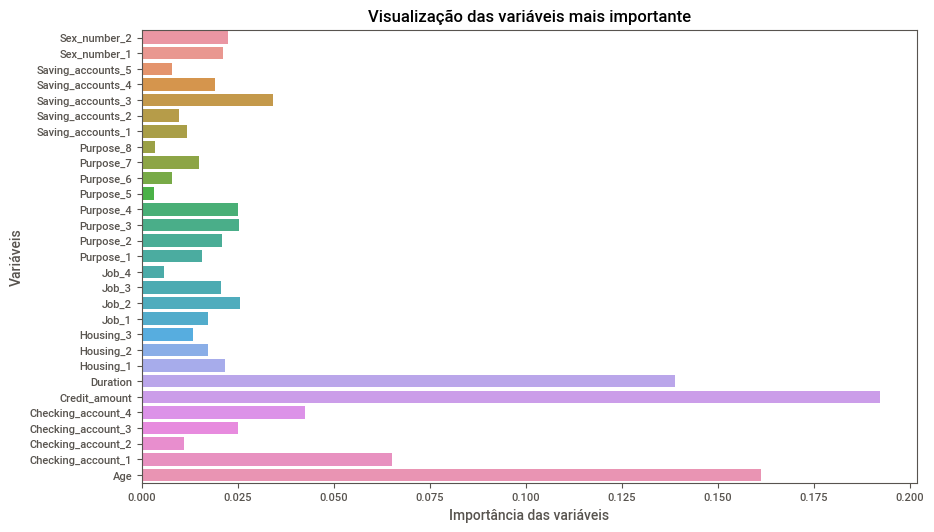

In [35]:
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x= variaveis_importantes, y= variaveis_importantes.index)

_ = plt.xlabel("Importância das variáveis")
_ = plt.ylabel("Variáveis")
_ = plt.title("Visualização das variáveis mais importante")

#### A forma gráfica é a mais fácil de identificar quais são as variáveis (*feature*) mais importante para o modelo trabalhado, como é o caso da duração do empréstimo, idade do agentes econômico e a quantidade de crédito tomado. Outras variáveis como o sexo, propósito e tipo de habilidade do agente econômico no trabalho pouco contribuíram para melhorar o modelo de risco de crédito.